## Modeling

In [ ]:
pip install pandas nltk sklearn tensorflow-hub tensorflow

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#### Retrieve preprocessed data

In [2]:
train = pd.read_csv('./preprocessed_data/trn.csv', delimiter = ',', names=['title','class'])
validate = pd.read_csv('./preprocessed_data/val.csv', delimiter = ',', names=['title','class'])
test = pd.read_csv('./preprocessed_data/tst.csv', delimiter = ',', names=['title','class'])

x_train = train['title']
x_test = test['title']
x_validate = validate['title']

y_train = train['class']
y_test = test['class']
y_validate = validate['class']

In [3]:
print(train.shape)
print(x_train.shape)
print(y_train.shape)

print(test.shape)
print(x_test.shape)
print(y_test.shape)

(30986, 2)
(30986,)
(30986,)
(4428, 2)
(4428,)
(4428,)


In [4]:
train['title']

0        funny moron crooked hillary frighten every ame...
1         u judge throw texas voter id law supported trump
2        former gop rep think adam schiff recuse russia...
3        thai junta set firm date election many false s...
4        first person killed terrorist speeding truck a...
                               ...                        
30981    saudi arabia something truly disgusting attemp...
30982    jockeying cash north korea allows racetrack ga...
30983    egypt declares three day mourning attack north...
30984    trump indonesian business partner see conflict...
30985    lie witness news jimmy kimmel show asks people...
Name: title, Length: 30986, dtype: object

In [5]:
train['class']

0        0
1        1
2        0
3        1
4        0
        ..
30981    0
30982    1
30983    1
30984    1
30985    0
Name: class, Length: 30986, dtype: int64

### Embedding

##### BoW (Count Vectorizer)

In [6]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_train)
freq_term_matrix = count_vectorizer.transform(x_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [7]:
pd.DataFrame(print(freq_term_matrix))

  (0, 479)	1
  (0, 3270)	1
  (0, 4937)	1
  (0, 5727)	1
  (0, 5797)	1
  (0, 6638)	1
  (0, 9137)	1
  (0, 15084)	1
  (1, 6918)	1
  (1, 7653)	1
  (1, 8017)	1
  (1, 13679)	1
  (1, 14049)	1
  (1, 14127)	1
  (1, 14462)	1
  (1, 15179)	1
  (2, 153)	1
  (2, 5631)	1
  (2, 6070)	1
  (2, 10797)	1
  (2, 11258)	1
  (2, 11346)	1
  (2, 11575)	1
  (2, 12085)	1
  (2, 12296)	1
  :	:
  (30983, 9523)	1
  (30983, 12796)	1
  (30983, 13353)	1
  (30983, 13973)	1
  (30983, 14117)	1
  (30984, 1949)	1
  (30984, 2887)	1
  (30984, 7147)	1
  (30984, 7317)	1
  (30984, 10108)	1
  (30984, 12427)	1
  (30984, 14462)	1
  (30985, 781)	1
  (30985, 3476)	1
  (30985, 3510)	2
  (30985, 6413)	1
  (30985, 7588)	1
  (30985, 7798)	1
  (30985, 8190)	1
  (30985, 9428)	1
  (30985, 10240)	1
  (30985, 12708)	1
  (30985, 14105)	1
  (30985, 15084)	1
  (30985, 15526)	1


""


In [8]:
pd.DataFrame(print(tf_idf_matrix))

  (0, 15084)	0.13843016816211584
  (0, 9137)	0.4499947599038438
  (0, 6638)	0.2036286360315688
  (0, 5797)	0.4034380026678006
  (0, 5727)	0.5204324144420963
  (0, 4937)	0.3438117446027605
  (0, 3270)	0.3499274266015099
  (0, 479)	0.2502185915879352
  (1, 15179)	0.31242279332262335
  (1, 14462)	0.12026174073504135
  (1, 14127)	0.39160438904225275
  (1, 14049)	0.3514964086802417
  (1, 13679)	0.4905581277255484
  (1, 8017)	0.2958227322263944
  (1, 7653)	0.30910587719019567
  (1, 6918)	0.4328054761698361
  (2, 14090)	0.2926896878918712
  (2, 12296)	0.40485259926301137
  (2, 12085)	0.21207542193064866
  (2, 11575)	0.3089281222728203
  (2, 11346)	0.41156323491431374
  (2, 11258)	0.28911242411460486
  (2, 10797)	0.25767958674807995
  (2, 6070)	0.23435233271615463
  (2, 5631)	0.2514685577328871
  :	:
  (30983, 9150)	0.325269912589253
  (30983, 4559)	0.30020334081125344
  (30983, 3560)	0.31790728761548537
  (30983, 3476)	0.23747116912611235
  (30983, 869)	0.21159488746232533
  (30984, 14462)	0.

""


In [9]:
vectorizer = CountVectorizer(lowercase=False, min_df=1, max_df=1.0, ngram_range=(1,1))
x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

# Data information
vocab = vectorizer.vocabulary_
print("Vocab size = {}".format(len(vocab)))
print("Size of training data = {}".format(x_train_vector.shape))
print("Size of test data = {}".format(x_test_vector.shape))

Vocab size = 15759
Size of training data = (30986, 15759)
Size of test data = (4428, 15759)


### Baseline model Logistic Regression

In [10]:
logistic_regression= LogisticRegression(fit_intercept=True, penalty="l2", C=1, max_iter=200)
logistic_regression.fit(x_train_vector,y_train)

print("Training accuracy = {}".format(logistic_regression.score(x_train_vector, y_train)))
print("Test accuracy = {}".format(logistic_regression.score(x_test_vector, y_test)))

Training accuracy = 0.9809914154779578
Test accuracy = 0.9480578139114725


In [11]:
predictions_lr=logistic_regression.predict(x_test_vector)

print("LOGISTIC REGRESSION: PERFORMANCE METRICS\n")

accuracy_logistic = accuracy_score(y_test, predictions_lr)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

precision_logistic = precision_score(y_test, predictions_lr, average=None)
print("Precision: %.2f%%" % (precision_logistic[1] * 100.0))

f1score_logistic= f1_score(y_test, predictions_lr, average=None)
print("F1 Score: %.2f%%" % (f1score_logistic[1] * 100.0))

recall_logistic = recall_score(y_test, predictions_lr, average=None)
print("Recall: %.2f%%" % (recall_logistic[1] * 100.0))

LOGISTIC REGRESSION: PERFORMANCE METRICS


Accuracy: 94.81%
Precision: 93.64%
F1 Score: 94.82%
Recall: 96.03%



Confusion matrix, without normalization
[[2091  143]
 [  87 2107]]

Normalized confusion matrix
[[0.94 0.06]
 [0.04 0.96]]


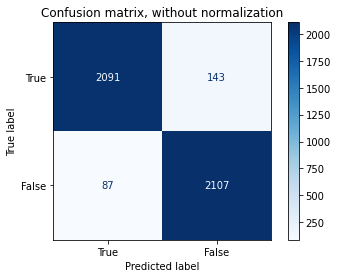

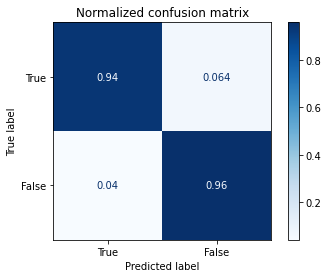

In [14]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, x_test_vector, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

### Running on various models:
1. Logistic Regression
2. Multinomial NB
3. Random Forest Classifier
4. GradientBoosting Classifier
5. AdaBoost Classifier
6. Decision Tree Classifier
7. Passive Aggressive Classifier
8. SVC

In [ ]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm,naive_bayes

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# type of models to be explored
models = [
    LogisticRegression(max_iter=200),
    MultinomialNB(),
    RandomForestClassifier(n_estimators = 30), #30 decision trees
    GradientBoostingClassifier(),
    AdaBoostClassifier(n_estimators=50, learning_rate=1),
    DecisionTreeClassifier(),
    PassiveAggressiveClassifier(max_iter=50),
    svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
]

# metrics table to contain results of model 
df_metrics = pd.DataFrame(columns=['Model', 'Accuracy - training set', 'Accuracy - testing set', 'Precision', 'Recall', 'f1-score'])

def convert_5sf(f):
    '''
    Helper function to get 5 significant figures from a float.
    '''
    return float("{0:.5f}".format(f))

def model_training(model, i):
    '''
    Function that runs the model training based on the model specified in the argument on the dataset.
    Appends the results to a tabular format for visualisation.
    '''
    # model type
    model_type = type(model).__name__
    # fit onto model
    model.fit(x_train_vector, y_train)
    # predictions of model
    Y_pred = model.predict(x_test_vector)

    # add to metrics dataframe
    df_metrics.loc[i] = [
        # model type
        type(model).__name__,
        # accuracy - training set score and testing set score
        convert_5sf(model.score(x_train_vector, y_train)),
        convert_5sf(model.score(x_test_vector, y_test)),
        convert_5sf(precision_score(y_test, Y_pred)),
        convert_5sf(recall_score(y_test, Y_pred)),
        convert_5sf(f1_score(y_test, Y_pred))
    ]
    print('Completed {} model training and assessment.'.format(model_type))

# execute model training for each model
for i, model in enumerate(models):
    model_training(model, i)

Completed LogisticRegression model training and assessment.
Completed MultinomialNB model training and assessment.
Completed RandomForestClassifier model training and assessment.
Completed GradientBoostingClassifier model training and assessment.
Completed AdaBoostClassifier model training and assessment.
Completed DecisionTreeClassifier model training and assessment.
Completed PassiveAggressiveClassifier model training and assessment.
Completed SVC model training and assessment.


In [49]:
# display the results of model training for all models
df_metrics[['Model', 'Accuracy - testing set', 'Precision', 'Recall', 'f1-score']]

,Model,Accuracy - testing set,Precision,Recall,f1-score
0,LogisticRegression,0.94806,0.93644,0.96035,0.94824
1,MultinomialNB,0.93902,0.94703,0.92890,0.93787
2,RandomForestClassifier,0.93089,0.92105,0.94120,0.93102
3,GradientBoostingClassifier,0.83220,0.76702,0.94986,0.84871
4,AdaBoostClassifier,0.84440,0.78865,0.93710,0.85649
5,DecisionTreeClassifier,0.90402,0.90667,0.89881,0.90272
6,PassiveAggressiveClassifier,0.93564,0.93054,0.94029,0.93539
7,SVC,0.94557,0.94006,0.95077,0.94539


#### Identify the best results yielded by the various models

In [50]:
# look for the best accuracy and f1 score
max_test_accuracy_index = df_metrics['Accuracy - testing set'].idxmax()
max_f1_score_index = df_metrics['f1-score'].idxmax()

print('Max accuracy score: ' + df_metrics['Model'][max_test_accuracy_index] + ' ' + str(df_metrics['Accuracy - testing set'][max_test_accuracy_index]))
print('Max f1 score: ' + df_metrics['Model'][max_f1_score_index] + ' ' + str(df_metrics['f1-score'][max_f1_score_index]))

Max accuracy score: LogisticRegression 0.94806
Max f1 score: LogisticRegression 0.94824


Logistics Regression seems to work the best with BoW and have the highest accuracy score.

## Deep learning Models

In [ ]:
pip install tensorflow

In [4]:
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

In [24]:
x_train.shape

(30986,)

##### Using keras's inbuilt Tokenizer to convert vectors to be part of the NN model.
1. Create a tokenizer object from keras.preprocessing.text.
2. Fit the tokenizer on the sentences that form the training set. This operation creates a "vocabulary" based on the input text.
3. Create numerical sequences, e.g., [1,123,42,67,....,91], by only accounting for the most frequent "max_words - 1" words. This "converts" the training sequences into vectors where entries reflect the "ID" that each word has in the vocabulary.
4. Pad these training sequences to ensure that all of them include "max_len" entries. The padding, i.e., adding zeros until length(sequence) = max_len, and truncating, i.e., removing entries until length(sequence) = max_len, are set to "post", i.e., these operations are conducted at the end of the sequence.
5. Create numerical sequences, e.g., [1,123,42,67,....,91], by only accounting for the most frequent "max_words - 1" words. This "converts" the test sequences into vectors where entries reflect the "ID" that each word has in the vocabulary. Note that we have not created a new vocabulary for test sequences. This decision allows us to prevent any "information leak" from the test set.
6. Pad these test sequences to ensure that all of them include "max_len" entries. The padding, i.e., adding zeros until length(sequence) = max_len, and truncating, i.e., removing entries until length(sequence) = max_len, are set to "post", i.e., these operations are conducted at the end of the sequence.

In [19]:
max_features = 1000
tokenizer = Tokenizer(num_words = max_features, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower = True, split = ' ')
tokenizer.fit_on_texts(texts = x_train)
word_index = tokenizer.word_index
vocab_size = len(word_index)
print(vocab_size)

15777


In [20]:
X_train_tokenized = tokenizer.texts_to_sequences(texts = x_train)
X_train_tokenized = pad_sequences(X_train_tokenized, maxlen = max_features, padding='pre')

X_test_tokenized = tokenizer.texts_to_sequences(texts = x_test)
X_test_tokenized = pad_sequences(X_test_tokenized, maxlen = max_features, padding='pre')

print(X_train_tokenized.shape)
print(X_test_tokenized.shape)
print(y_train.shape)
print(y_test.shape)

(30986, 1000)
(4428, 1000)
(30986,)
(4428,)


### Baseline Dense Model
* alternating dense layers with 512 neurons
* dropout layers set to a rate of 0.2
* max_features of 200

In [21]:
# max_features = 200
# tokenizer = Tokenizer(num_words = max_features, 
#                       filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
#                       lower = True, split = ' ')
# tokenizer.fit_on_texts(texts = x_train)
# word_index = tokenizer.word_index
# vocab_size = len(word_index)
# print(vocab_size)

# X_train_tokenized = tokenizer.texts_to_sequences(texts = x_train)
# X_train_tokenized = pad_sequences(X_train_tokenized, maxlen = max_features, padding='pre')

# X_test_tokenized = tokenizer.texts_to_sequences(texts = x_test)
# X_test_tokenized = pad_sequences(X_test_tokenized, maxlen = max_features, padding='pre')

# print(X_train_tokenized.shape)
# print(X_test_tokenized.shape)
# print(y_train.shape)
# print(y_test.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),                         
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


15777
(30986, 200)
(4428, 200)
(30986,)
(4428,)


In [22]:
%%time
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_tokenized, y_train, epochs=5, batch_size=100, validation_data=(X_test_tokenized, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 120)         24000     
                                                                 
 dense_20 (Dense)            (None, None, 512)         61952     
                                                                 
 dropout_16 (Dropout)        (None, None, 512)         0         
                                                                 
 dense_21 (Dense)            (None, None, 512)         262656    
                                                                 
 dropout_17 (Dropout)        (None, None, 512)         0         
                                                                 
 dense_22 (Dense)            (None, None, 512)         262656    
                                                                 
 dropout_18 (Dropout)        (None, None, 512)        

### Bi-Directional LSTM:
* bi-directional LSTM layer
* Sequential API - alternating dense layers with 512 neurons
* Convulation 1d layer (first layer with 64 sequences of 5 dimension vectors)
* dropout layers set at 0.5 rate

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

UsageError: Line magic function `%%time` not found.


In [29]:
%%time
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_tokenized, y_train, epochs=5, batch_size=100, validation_data=(X_test_tokenized, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 120)         120000    
                                                                 
 dropout (Dropout)           (None, None, 120)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          38464     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        132000    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              2

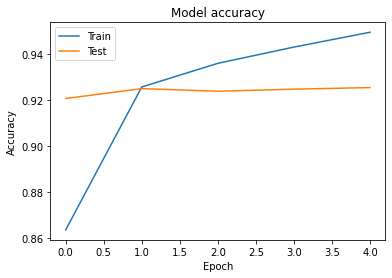

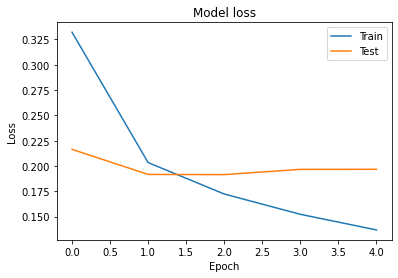

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Accuracy starts to dip after it peaks at a certain epoch.

In [34]:
print('Evaluate')
result = model.evaluate(X_test_tokenized, y_test)
print(result)

Evaluate
139/139 [==============================] - 23s 166ms/step - loss: 0.1967 - accuracy: 0.9255
[0.1967155784368515, 0.925474226474762]


### Hybrid CNN-RNN
* convolution 1D layer
* 2 dense layers
* 3 dropout layers with 0.5 rates
* keras tokenizer

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = max_features, output_dim = 120),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
%%time
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_tokenized, y_train, epochs=5, batch_size=100, validation_data=(X_test_tokenized, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 120)         120000    
                                                                 
 dropout_3 (Dropout)         (None, None, 120)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          38464     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, None, 20)          6800      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                      

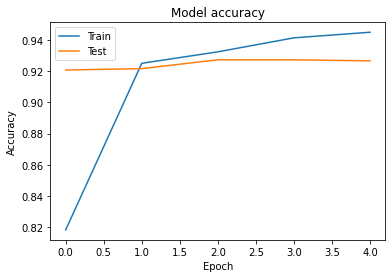

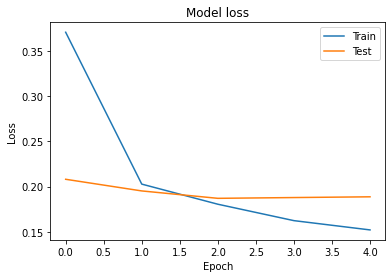

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Amongst the deep learning models explored, hybrid CNN-RNN yields the best results at a 92.66% accuracy rate.

However, amongst all of the previous models explored, Logistics Regression still yields the highest accuracy rate of 94.8% with the BoW embeddings. 

We will use the LR model for our classifier in the flask server.